In [1]:
import pandas as pd
import numpy as np

In [47]:
titanic_data = pd.read_csv("titanic_train.csv")

In [48]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
titanic_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [85]:
tit_cat = titanic_data.select_dtypes([object])
tit_num = titanic_data.select_dtypes([np.number]) 

In [86]:
tit_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [87]:
tit_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [88]:
tit_cat.isna().sum()

Sex         0
Embarked    2
dtype: int64

In [89]:
tit_cat.Embarked.fillna(tit_cat.Embarked.value_counts().idxmax(), inplace=True)

/Users/singhhim1/anaconda3/envs/ADP/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [90]:
tit_num.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [91]:
tit_num.Age.fillna(tit_num.Age.mean(), inplace=True)

In [92]:
tit_num.drop(["Survived"], axis=1, inplace=True)

/Users/singhhim1/anaconda3/envs/ADP/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le = LabelEncoder()

In [95]:
tit_cat = tit_cat.apply(le.fit_transform)

In [96]:
tit_cat.head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [97]:
Y = titanic_data["Survived"]

In [98]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
ss = StandardScaler()

In [101]:
tit_num = pd.DataFrame(ss.fit_transform(tit_num))

In [102]:
tit_num.head()

,0,1,2,3,4
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337


In [103]:
titanic_processed = pd.concat([tit_cat, tit_num], axis=1)

In [104]:
X = titanic_processed

In [105]:
X.head()

,Sex,Embarked,0,1,2,3,4
0,1,2,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,0,0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0,2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,0,2,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,1,2,0.827377,0.407926,-0.474545,-0.473674,-0.486337


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.05)

In [108]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(846, 45, 846, 45)

In [109]:
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr = LogisticRegression()

In [112]:
lr.fit(X_train, Y_train)

/Users/singhhim1/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/singhhim1/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
pred = np.where(lr.predict_proba(X_test)[:,1] > 0.6, 1, 0)

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [145]:
print("Accuracy Score is", accuracy_score(pred,Y_test))
print("Precision Score is", precision_score(pred,Y_test))
print("Recall Score is", recall_score(pred,Y_test))
print("F1 Score is", f1_score(pred,Y_test))

Accuracy Score is 0.8888888888888888
Precision Score is 0.7692307692307693
Recall Score is 0.8333333333333334
F1 Score is 0.8


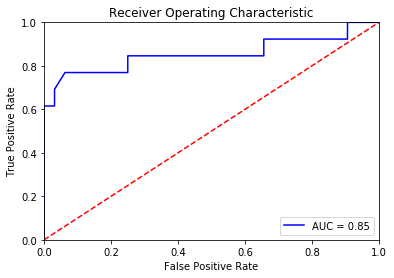

In [146]:
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()